## Importación de los datos

In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import math

In [2]:
sharks = pd.read_csv('../data/attacks.csv')
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploración de datos

In [3]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
sharks.shape

(25723, 24)

In [5]:
# Utilizamos el metodo info para ver el tipo de datos que hay en cada columna

sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
# Veamos el numero de valores nulos que hay en las columnas

null_cols = sharks.isnull().sum()
null_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
df = sharks.copy()

Se puede ver que la columna 'Case Number' tiene muchos menos valores nulos que 'Case Number.1' y 'Case Number.2' que tienen un numero de nulos idénticos. Por lo tanto, habrá que tratar en una primera instancia 'Case Number.1' y luego igualar las otras dos columnas a estas.

# Tratamiento del subset de las fechas

In [8]:
fechas = df[['Case Number', 'Date', 'Year', 'Case Number.1', 'Case Number.2']]
fechas.head()

,Case Number,Date,Year,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,2018.06.04,2018.06.04


In [9]:
def check_nan(df):
    
    nan_cols=df.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 5'

Case Number      66.170353
Date             75.500525
Year             75.508300
Case Number.1    75.500525
Case Number.2    75.500525
dtype: float64

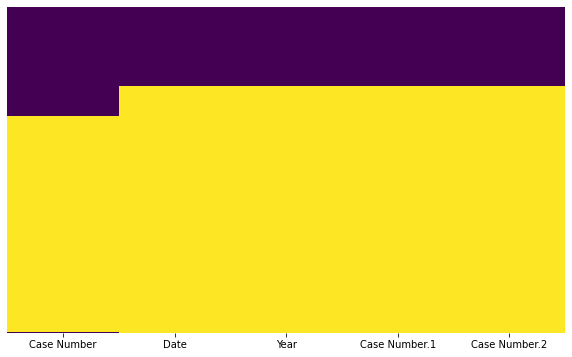

In [10]:
check_nan(fechas)

Ahora es somos realmente conscientes de la basura que son estos datos, pues todo lo amarillo representa los valores nulos que contienen y que debemos modificar.

El plan se basa en modificar los valores de 'Case Number.1' para más tarde igualar las columnas 'Case number.2' y 'Case Number' a esta, pues se refieren exactamente a lo mismo

In [11]:
#list(df['Case Number.1'].unique())

La primera modificacion que vamos a hacer es darle un valor no nulo a los nulos, por ejemplo 'inexistente'

In [12]:
fechas['Case Number.1'] = fechas['Case Number.1'].fillna('Inexistente')
'Inexistente' in list(fechas['Case Number.1'])

True

In [13]:
def quita_letras(string):
    
    if len(string) > 10:
        
        if string == 'Inexistente':
            string = string
        
        else:
            string = string[0:10]
        
    return string

Vamos a poner las fechas en el formato 'yyyy.mm.dd'

In [14]:
fechas['Case Number.1'] = fechas['Case Number.1'].astype(str) #pasamos cada elemento de la fila a string

In [15]:
fechas['Case Number.1'] = fechas['Case Number.1'].apply(quita_letras) 
list(fechas['Case Number.1'])

['2018.06.25',
 '2018.06.18',
 '2018.06.09',
 '2018.06.08',
 '2018.06.04',
 '2018.06.03',
 '2018.06.03',
 '2018.05.27',
 '2018.05.26',
 '2018.05.26',
 '2018.05.24',
 '2018.05.21',
 '2018.05.13',
 '2018.05.13',
 '2018.05.00',
 '2018.05.12',
 '2018.05.09',
 '2018.04.30',
 '2018.04.28',
 '2018.04.28',
 '2018.04.25',
 '2018.04.25',
 '2018.04.24',
 '2018.04.23',
 '2018.04.22',
 '2018.04.19',
 '2018.04.15',
 '2018.04.15',
 '2018.04.15',
 '2018.04.15',
 '2018.04.14',
 '2018.04.10',
 '2018.04.09',
 '2018.04.05',
 '2018.04.02',
 '2018.03.31',
 '2018.03.14',
 '2018.03.09',
 '2018.03.09',
 '2018.02.24',
 '2018.02.23',
 '2018.02.17',
 '2018.02.15',
 '2018.02.14',
 '2018.02.11',
 '2018.02.03',
 '2018.02.01',
 '2018.01.28',
 '2018.01.21',
 '2018.01.14',
 '2018.01.13',
 '2018.01.12',
 '2018.01.05',
 '2017.12.31',
 '2017.12.30',
 '2017.12.21',
 '2017.12.09',
 '2017.11.30',
 '2017.11.30',
 '2017.11.25',
 '2017.11.24',
 '2017.11.18',
 '2017.11.13',
 '2017.11.13',
 '2017.11.04',
 '2017.10.31',
 '2017.10.

In [16]:
fechas['Case Number.1'] = fechas['Case Number.1'].str.replace('.','/')
#list(df['Case Number.1'])

Ahora igualamos las columnas 'Case number' y 'Case Number.2' a 'Case Number.1'.

In [17]:
fechas['Case Number.2'] = fechas['Case Number.1']
fechas['Case Number'] = fechas['Case Number.1']

Veamos ahora si queda algun valor nulo en estas columnas.

'N nan cols: 2'

Date    75.500525
Year    75.508300
dtype: float64

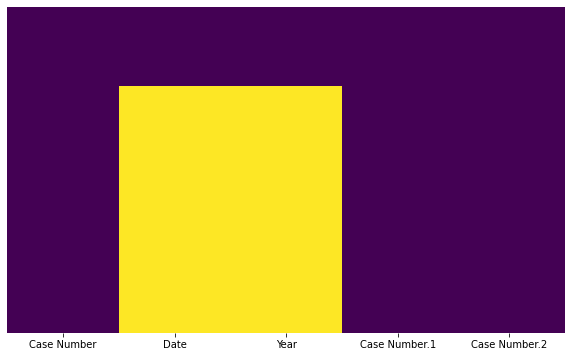

In [18]:
check_nan(fechas)

A continuacion tenemos que modificar las columnas 'Date' y 'year' para quitar los valores nulos. Como 'Date' tiene el mismo numero de valores nulos que 'Case Number.1' Modificaremos primero esta y luego tomaremos solo el año para añadirselo a la columnas 'Year'

In [19]:
fechas['Date'] = fechas['Date'].fillna('Inexistente')
fechas.Date = fechas.Date.astype(str)

Vamos a dejar las fechas en formato 'dd-mmm-yyyy'.

In [20]:
def quita_report(string):
    
    if len(string) > 11:
        string = string[len(string)-11:len(string)]
    
    return string

In [21]:
fechas['Date'] = fechas['Date'].apply(quita_report)
fechas['Date']

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
25718    Inexistente
25719    Inexistente
25720    Inexistente
25721    Inexistente
25722    Inexistente
Name: Date, Length: 25723, dtype: object

Ya hemos obtenido en 'Date' el formato de fecha que queríamos por lo tanto ahora debemos cambiar la columna de 'Year' para obtener el mismo año que el que viene en 'Date'.

In [22]:
date = '04-Jun-2018'
date[len(date)-4:len(date)]

'2018'

In [23]:
fechas['Year'] = fechas['Date'].apply(lambda x : x[len(x)-4:len(x)])
fechas['Year'] = fechas['Year'].apply(lambda x : 'No hay' if x == 'ente' else x)
list(fechas['Year'])

['2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 

En teoría, gracias a los cambios que se han hecho, no deberían aparecer valores nulos

'N nan cols: 0'

Series([], dtype: float64)

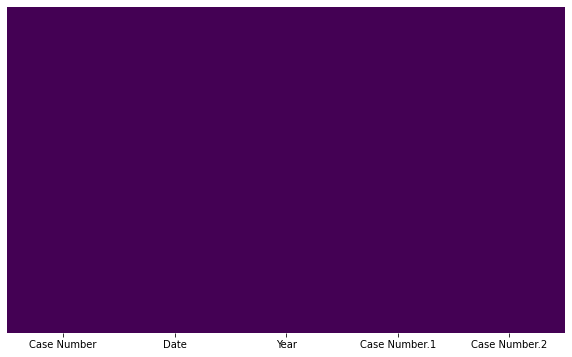

In [24]:
check_nan(fechas)

In [25]:
fechas.head()

,Case Number,Date,Year,Case Number.1,Case Number.2
0,2018/06/25,25-Jun-2018,2018,2018/06/25,2018/06/25
1,2018/06/18,18-Jun-2018,2018,2018/06/18,2018/06/18
2,2018/06/09,09-Jun-2018,2018,2018/06/09,2018/06/09
3,2018/06/08,08-Jun-2018,2018,2018/06/08,2018/06/08
4,2018/06/04,04-Jun-2018,2018,2018/06/04,2018/06/04


Por lo tanto, se ha limpiado este subconjunto de columnas, tal y como se deseaba

# Tratamiento del subset {Type, Country, Area, Sex, Age, Investigator}

In [26]:
subset2 = df[['Type', 'Country', 'Area', 'Sex ', 'Age', 'Investigator or Source']]

In [27]:
subset2.head()

,Type,Country,Area,Sex,Age,Investigator or Source
0,Boating,USA,California,F,57,"R. Collier, GSAF"
1,Unprovoked,USA,Georgia,F,11,"K.McMurray, TrackingSharks.com"
2,Invalid,USA,Hawaii,M,48,"K.McMurray, TrackingSharks.com"
3,Unprovoked,AUSTRALIA,New South Wales,M,NaN,"B. Myatt, GSAF"
4,Provoked,MEXICO,Colima,M,NaN,A .Kipper


## Columna 'Type'

La columna 'Type' esta compuesta por las siguientes palabras:

In [28]:
subset2.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [29]:
subset2['Type'] = subset2['Type'].apply(lambda x : 'Boat' if x == 'Boatomg' or x == 'Boating' else x)
subset2.Type.unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

A continuacion, se van a rellenar las celdas con nan distinguiendo si es porque no hay registro o porque no se ha registrado el ataque.

In [30]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Type'][i] = 'None'
        
list(subset2['Type'].unique())

['Boat',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan,
 'None']

In [31]:
subset2['Type'] = subset2['Type'].fillna('Unknow')
subset2['Type'].unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Unknow', 'None'], dtype=object)

## Columna 'Country'

Ya se ha limpiado la columna 'Type', pues no queda ningun valor nulo. A continuación, se analiza la columna 'Country'.

In [32]:
subset2['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

Como la columna 'Country' tiene más valores nulos que la columna 'Case Number.1' quiqere decir que existen ataques en los que no se ha registrado el país, y por tanto, hay que diferenciar los paises no registrados de los registros nulos. Para ello, se procede de manera análoga a la anterior.

In [33]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Country'][i] = 'None'
        
list(subset2['Country'].unique())

['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'ENGLAND',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 nan,
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'COMOROS',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'CAPE VERDE',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'CAYMAN ISLANDS',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ITALY',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'JAMAICA',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'CANADA',
 'CROATIA',
 'SAUDI ARABIA',
 'CHILE',
 'ANTIGUA',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'UNITED ARAB EMIRATES (UAE)',
 'AZORES',
 

In [34]:
subset2['Country'] = subset2['Country'].fillna('No registrado')
subset2['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'No registrado', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, British overseas territory',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAI

Ya no quedan celdas nulas en 'Country', por tanto solo hace falta hacer cambios para que los datos aparezcan de la forma deseada.

In [35]:
def mayusculizador(string):
    
    for i in range(len(string)):
        
        if string[i].islower() and string != 'None' and string != 'No registrado':
            string = string.upper()
            
    return string

In [36]:
subset2['Country'] = subset2['Country'].apply(mayusculizador)

## Columna 'Area'

In [37]:
subset2.Area

0             California
1                Georgia
2                 Hawaii
3        New South Wales
4                 Colima
              ...       
25718                NaN
25719                NaN
25720                NaN
25721                NaN
25722                NaN
Name: Area, Length: 25723, dtype: object

In [38]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Area'][i] = 'None'
        
list(subset2['Area'].unique())

['California',
 'Georgia',
 'Hawaii',
 'New South Wales',
 'Colima',
 'Pernambuco',
 'Florida',
 'Queensland',
 'South Carolina',
 'Cornwall',
 'Westerm Australia',
 'Eastern Cape Province',
 'Hua Hin',
 'Cocos Island',
 'Western Australia',
 'Alifu Alifu Atoll',
 'Western Cape Province',
 'New Providence',
 'Alagoas',
 nan,
 'Victoria',
 'KwaZulu-Natal',
 'Boi Island, Victoria',
 'Galapagos Islands',
 'Fernando de Noronha',
 'Sepang',
 'Holquin Province',
 'Pamplemousses ',
 'South Australia',
 'North Island',
 'New York',
 'Canary Islands',
 ' Upolu Island',
 'Shizuoka Prefecture',
 'Texas',
 'Castell�n',
 'Massachusetts',
 'Red Sea Protectorate',
 'New Providence District',
 '40 miles off Grand Bahama Island',
 'Ascension Island',
 'New Jersey',
 'Majorca',
 'Washington',
 'Tabasco',
 'Anjouan',
 'Ibiza Island',
 'Marquesas',
 'South Devon',
 'New Providence ',
 'Sharjah, ',
 'Baja California Sur',
 'Saint-Leu',
 'South Island',
 'Luzon Island',
 'Great Exuma',
 'Saint-Andre',
 'Bim

In [39]:
subset2['Area'] = subset2['Area'].fillna('Desconocida')
subset2['Area'].unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', 'Desconocida', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castell�n', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Is

## Columna 'Sex'

Para limpiar esta columna se va a proceder de forma análoga a las anteriores

In [40]:
subset2['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [41]:
subset2.head()

,Type,Country,Area,Sex,Age,Investigator or Source
0,Boat,USA,California,F,57,"R. Collier, GSAF"
1,Unprovoked,USA,Georgia,F,11,"K.McMurray, TrackingSharks.com"
2,Invalid,USA,Hawaii,M,48,"K.McMurray, TrackingSharks.com"
3,Unprovoked,AUSTRALIA,New South Wales,M,NaN,"B. Myatt, GSAF"
4,Provoked,MEXICO,Colima,M,NaN,A .Kipper


In [42]:
subset2['Sex '] = subset2['Sex '].astype(str)

In [43]:
subset2['Sex '] = subset2['Sex '].apply(lambda x : x.strip())
subset2['Sex '].unique()

array(['F', 'M', 'nan', 'lli', 'N', '.'], dtype=object)

In [44]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Sex '][i] = 'None'
        
list(subset2['Sex '].unique())

['F', 'M', 'nan', 'lli', 'N', '.', 'None']

In [45]:
def genero(string):
    
    if string != 'F' and string != 'M':
        string = 'No se conoce'
        
    return string

In [46]:
subset2['Sex '] = subset2['Sex '].apply(genero)

## Columna 'Age'

El procedimiento va a ser igual al que hemos realizado previamente en las otras columnas.

In [47]:
subset2.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '� ', ' ', '30 or 36', '6�', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
     

In [48]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Age'][i] = 'None'
        
list(subset2['Age'].unique())

['57',
 '11',
 '48',
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '21',
 '34',
 '30',
 '60',
 '33',
 '29',
 '54',
 '41',
 '37',
 '56',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '46',
 '45',
 '14',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '8',
 '50',
 '16',
 '82',
 '73',
 '20s',
 '68',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '27',
 '64',
 '23',
 '71',
 '44',
 '62',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 'teen',
 '77',
 '74',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '8 or 10',
 '84',
 '� ',
 ' ',
 '30 or 36',
 '6�',
 '21 & ?',
 '75',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 "60's",
 '32 & 30',
 '16 to 18',
 '87',
 '67',
 'Elderly',
 'mid-20s',
 'Ca. 33',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '9 mo

In [49]:
subset2.Age = subset2.Age.fillna('Unknow')

In [50]:
subset2.Age = subset2.Age.astype(str)

In [51]:
def edad(string):
    
    if len(string) > 2:
        string = string.split(' ')[0]
        
    return string

In [52]:
subset2.Age = subset2.Age.apply(edad)

In [53]:
subset2.Age

0            57
1            11
2            48
3        Unknow
4        Unknow
          ...  
25718      None
25719      None
25720      None
25721      None
25722      None
Name: Age, Length: 25723, dtype: object

In [54]:
('^[a-zA-Z]{1,3}' in subset2.Age)

False

Esta ultima casilla es para ver si existen palabras en las casillas de edad. Ahora se comprueba si queda algun valor nulo en esta columna.

'N nan cols: 1'

Investigator or Source    75.566614
dtype: float64

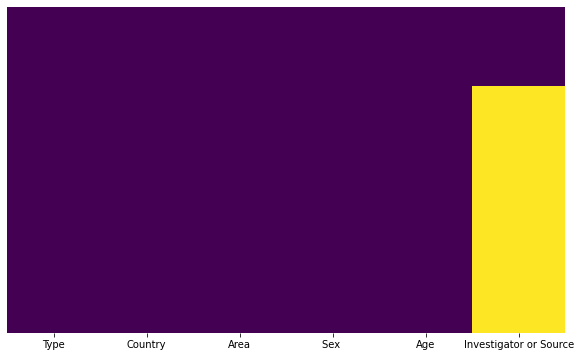

In [55]:
check_nan(subset2)

## Columna de 'Investigator or source'

In [56]:
subset2.head()

,Type,Country,Area,Sex,Age,Investigator or Source
0,Boat,USA,California,F,57,"R. Collier, GSAF"
1,Unprovoked,USA,Georgia,F,11,"K.McMurray, TrackingSharks.com"
2,Invalid,USA,Hawaii,M,48,"K.McMurray, TrackingSharks.com"
3,Unprovoked,AUSTRALIA,New South Wales,M,Unknow,"B. Myatt, GSAF"
4,Provoked,MEXICO,Colima,M,Unknow,A .Kipper


In [57]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset2['Investigator or Source'][i] = 'None'
        
list(subset2['Investigator or Source'].unique())

['R. Collier, GSAF',
 'K.McMurray, TrackingSharks.com',
 'B. Myatt, GSAF',
 'A .Kipper',
 'Daily Telegraph, 6/4/2018',
 'Diario de Pernambuco, 6/4/2018',
 'K. McMurray, TrackingSharks.com',
 'K. McMurray, Tracking Sharks.com',
 'ABC.net.au ,05/24/2018',
 'C. Creswell, GSAF',
 'C. Creswell, GSAF & K. McMurray TrackingSharks.com',
 'Perth Now, 6/30/2018',
 'B.Jacob, Dispatch Live, 5/12/2018',
 'Costa Rica Star. 4/28/2018',
 'B.Myatt, GSAF',
 'Africa News Agency, 4/22/2018',
 'The Garden Island, 4/19/2018',
 'Straits Times, 4/16/2018',
 'Globo, 4/16/2018',
 'Tribune242,',
 'Les Nouvelles Caledoniennes, 4/10/2018',
 'Khon2, 3/31/2018',
 'International Business Times, 3/1/2018',
 'Sunshine Coast Daily, 2/15/2018',
 'TrackingSharks.com',
 'The Standard (UK), 2/6/2018',
 'The West Australian, 2/2/2018',
 'ABC.net.au, 01/28/2018',
 'Perth Now, 1/6/2018',
 'J. Howard, Surfling Now, 1/2/2018',
 'R. Collier',
 'Daily Star, 12/11/2017',
 'R. Arauz',
 'TG Com 24, 11/25/2017',
 'Florida Today, 11/21

In [58]:
subset2['Investigator or Source'] = subset2['Investigator or Source'].fillna('Unknow')

'N nan cols: 0'

Series([], dtype: float64)

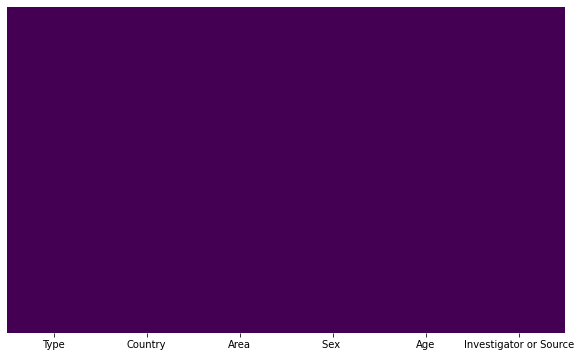

In [59]:
check_nan(subset2)

In [60]:
subset2.head()

,Type,Country,Area,Sex,Age,Investigator or Source
0,Boat,USA,California,F,57,"R. Collier, GSAF"
1,Unprovoked,USA,Georgia,F,11,"K.McMurray, TrackingSharks.com"
2,Invalid,USA,Hawaii,M,48,"K.McMurray, TrackingSharks.com"
3,Unprovoked,AUSTRALIA,New South Wales,M,Unknow,"B. Myatt, GSAF"
4,Provoked,MEXICO,Colima,M,Unknow,A .Kipper


# Tratamiento del subset {'Location', 'Activity', 'Injury', 'Fatal'}

In [61]:
subset3 = df[['Location', 'Activity', 'Injury', 'Fatal (Y/N)']]

In [62]:
subset3.head()

,Location,Activity,Injury,Fatal (Y/N)
0,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,Arrawarra Headland,Surfing,Minor injury to lower leg,N
4,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


'N nan cols: 4'

Location       77.599813
Activity       77.615364
Injury         75.609377
Fatal (Y/N)    77.595926
dtype: float64

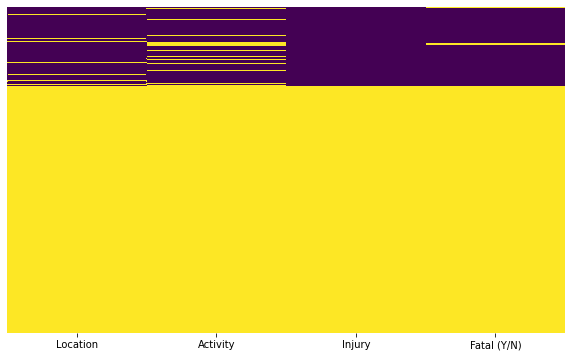

In [63]:
check_nan(subset3)

## Columna Location

El método a seguir va a ser igual que con 'Country' en el subset2

In [64]:
subset3['Location'].unique()

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Ocracoke Inlet', 'Panama Bay 8�N, 79�W',
       'Below the English fort, Trincomalee'], dtype=object)

In [65]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset3['Location'][i] = 'None'
        
list(subset3['Location'].unique())

['Oceanside, San Diego County',
 'St. Simon Island, Glynn County',
 'Habush, Oahu',
 'Arrawarra Headland',
 'La Ticla',
 'Flat Rock, Ballina',
 'Piedade Beach, Recife',
 'Lighhouse Point Park, Ponce Inlet, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Daytona Beach, Volusia County',
 'Cairns Aquarium',
 'Isle of Palms,  Charleston County',
 'Hilton Head Island, Beaufort County',
 "Off Land's End",
 'Dugong Bay',
 'Nahoon Beach, East London',
 'Sharpes Beach, Ballina',
 'Sai Noi Beach',
 'Manuelita',
 'Gearys Beach',
 'Lennox Head',
 'Surfers Point, Prevelly',
 'South Point, Gracetown',
 'Madoogali',
 'Robberg Beach, Plettenberg Bay',
 'Shipwreck�s Beach, Keoneloa Bay, Kauai',
 'Piedade',
 'Lefthanders, Margaret River Area',
 'Cobblestones, Margaret River Area',
 'Nirvana Beach',
 'Praia de Saua�uhy, Macei�',
 'Magenta Beach, Noumea',
 'Bimini',
 'St. Francis Bay',
 'Kukio Beach',
 "Waterman's Bay",
 'Lorne',
 'Winkipop',
 'Durban',
 'Little Congwong Beach, La Perouse ',
 'Western

In [66]:
subset3['Location'] = subset3['Location'].fillna('No registrado')

'N nan cols: 3'

Activity       77.615364
Injury         75.609377
Fatal (Y/N)    77.595926
dtype: float64

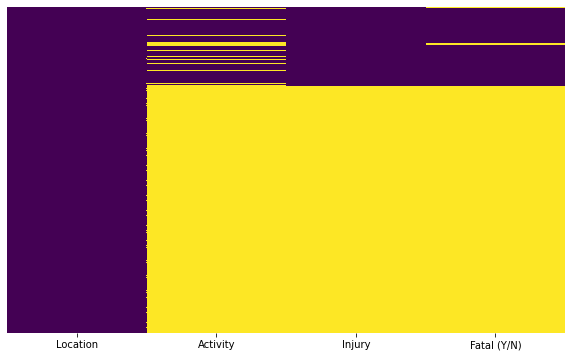

In [67]:
check_nan(subset3)

## Columna 'Activity'


In [68]:
subset3.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [69]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset3['Activity'][i] = 'None'
        
list(subset3['Activity'].unique())

['Paddling',
 'Standing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding sharks',
 'Boogie boarding',
 'Scuba diving',
 'Paddle-skiing',
 'Body boarding',
 'Windsurfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Scuba Diving',
 'Kayak fishing for sharks',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 nan,
 'Diving',
 'Fishing / Wading',
 '2 boats capsized',
 'Night bathing',
 'Surfing ',
 'Kayaking / Fishing',
 'Kayaking',
 'Body surfing',
 'Swimming, poaching abalone',
 'Canoeing',
 'SUP',
 'Skimboarding',
 'Touching a shark',
 'Fishing ',
 'Attempting to lasso a shark',
 'Photo shoot',
 'Paddle boarding',
 'Kakaying',
 'Washing hands',
 'Grabbing shark for a selfie',
 'Kayak fishing',
 'Tagging sharks',
 'Surf skiing ',
 'Surf fishing',
 'Floating',
 'Cage Diving',
 'Surfng',
 'SUP Foil boarding',
 'Lobstering',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing for squid',
 'Fishing for sharks',
 'Floating in tube',
 'Teasing a shar

In [70]:
subset3['Activity'].fillna('No registrado')

0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
            ...     
25718           None
25719           None
25720           None
25721           None
25722           None
Name: Activity, Length: 25723, dtype: object

In [71]:
list(subset3['Activity'].unique())

['Paddling',
 'Standing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding sharks',
 'Boogie boarding',
 'Scuba diving',
 'Paddle-skiing',
 'Body boarding',
 'Windsurfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Scuba Diving',
 'Kayak fishing for sharks',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 nan,
 'Diving',
 'Fishing / Wading',
 '2 boats capsized',
 'Night bathing',
 'Surfing ',
 'Kayaking / Fishing',
 'Kayaking',
 'Body surfing',
 'Swimming, poaching abalone',
 'Canoeing',
 'SUP',
 'Skimboarding',
 'Touching a shark',
 'Fishing ',
 'Attempting to lasso a shark',
 'Photo shoot',
 'Paddle boarding',
 'Kakaying',
 'Washing hands',
 'Grabbing shark for a selfie',
 'Kayak fishing',
 'Tagging sharks',
 'Surf skiing ',
 'Surf fishing',
 'Floating',
 'Cage Diving',
 'Surfng',
 'SUP Foil boarding',
 'Lobstering',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing for squid',
 'Fishing for sharks',
 'Floating in tube',
 'Teasing a shar

In [72]:
subset3['Activity'] = subset3['Activity'].fillna('Unknow')

'N nan cols: 2'

Injury         75.609377
Fatal (Y/N)    77.595926
dtype: float64

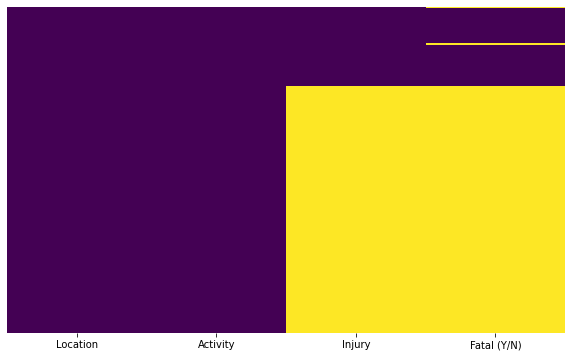

In [73]:
check_nan(subset3)

## Columna 'Injury'

In [74]:
list(subset3['Injury'].unique())

['No injury to occupant, outrigger canoe and paddle damaged',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury, board bitten',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury, marks on board',
 'No injury, surfboard damaged',
 'Minor injury to ankle',
 'No injury, shark bit scuba gear',
 'No injury, knocked off board by shark',
 'No injury',
 'No injury, shark struck his leg',
 '5-inch cut to hand',
 'No injury, shark bit hole in ski',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms

In [75]:
def minusculas(string):
    
    string = string.lower()
    
    return string

In [76]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset3['Injury'][i] = 'None'
        
list(subset3['Injury'].unique())

['No injury to occupant, outrigger canoe and paddle damaged',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury, board bitten',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury, marks on board',
 'No injury, surfboard damaged',
 'Minor injury to ankle',
 'No injury, shark bit scuba gear',
 'No injury, knocked off board by shark',
 'No injury',
 'No injury, shark struck his leg',
 '5-inch cut to hand',
 'No injury, shark bit hole in ski',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms

In [77]:
subset3['Injury'] = subset3['Injury'].fillna('Unknow')

In [78]:
subset3['Injury'] = subset3['Injury'].astype(str)

In [79]:
subset3['Injury'] = subset3['Injury'].apply(lambda x : x.lower())

In [80]:
list(subset3['Injury'].unique())

['no injury to occupant, outrigger canoe and paddle damaged',
 'minor injury to left thigh',
 'injury to left lower leg from surfboard skeg',
 'minor injury to lower leg',
 'lacerations to leg & hand shark provoked incident',
 'no injury, board bitten',
 'fatal',
 'minor injury to foot. provoked incident',
 'lower left leg bitten',
 'minor injury to foot',
 'minor bite to hand by captive shark. provoked incident',
 'injuries to lower right leg and foot',
 'severe bite to right forearm',
 'injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'shallow lacerations to finger provoked incident',
 'minor injury, marks on board',
 'no injury, surfboard damaged',
 'minor injury to ankle',
 'no injury, shark bit scuba gear',
 'no injury, knocked off board by shark',
 'no injury',
 'no injury, shark struck his leg',
 '5-inch cut to hand',
 'no injury, shark bit hole in ski',
 'lacerations to right lower leg',
 'lacerations to foot and ankle',
 'multiple severe injuries to arms

'N nan cols: 1'

Fatal (Y/N)    77.595926
dtype: float64

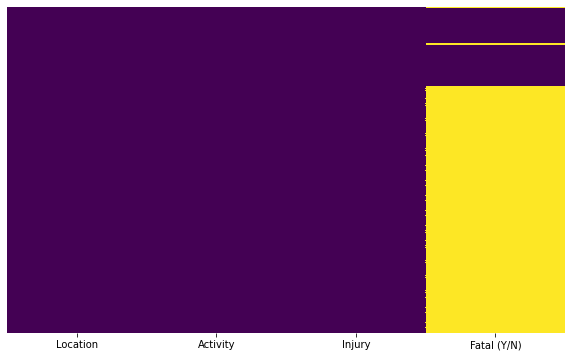

In [81]:
check_nan(subset3)

## Columna 'Fatal (Y/N)'

In [82]:
subset3['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [83]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset3['Fatal (Y/N)'][i] = 'None'
        
list(subset3['Fatal (Y/N)'].unique())

['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y', 'None']

In [84]:
subset3['Fatal (Y/N)'] = subset3['Fatal (Y/N)'].fillna('Unknown')

In [85]:
subset3['Fatal (Y/N)'] = subset3['Fatal (Y/N)'].astype(str)

In [86]:
subset3['Fatal (Y/N)'] = subset3['Fatal (Y/N)'].apply(lambda x : x.strip()) #con esto quitamos los espacios

In [87]:
subset3['Fatal (Y/N)'] = subset3['Fatal (Y/N)'].apply(lambda x : x.upper())

In [88]:
subset3['Fatal (Y/N)'].unique()

array(['N', 'Y', 'UNKNOWN', 'M', '2017', 'NONE'], dtype=object)

In [89]:
def changer(string):
    
    if string == 'M' or string == '2017':
        string = 'UNKNOWN'
    
    return string

In [90]:
subset3['Fatal (Y/N)'] = subset3['Fatal (Y/N)'].apply(changer)

'N nan cols: 0'

Series([], dtype: float64)

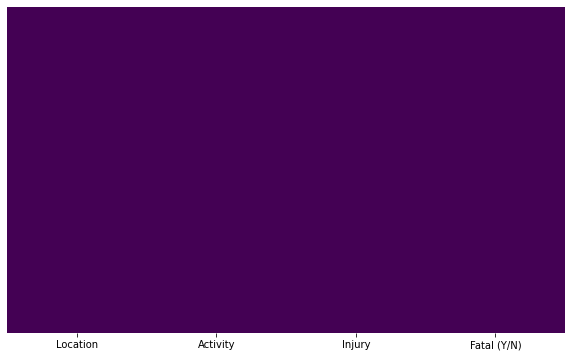

In [91]:
check_nan(subset3)

# Tratamiento del subset {'pdf', 'href formula', 'href', 'original order', 'Unnamed: 22', 'Unnamed: 23}

In [92]:
subset4 = df[['pdf', 'href formula', 'href', 'original order', 'Unnamed: 22', 'Unnamed: 23']]

In [93]:
subset4.head()

,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN


'N nan cols: 6'

pdf               75.500525
href formula      75.504412
href              75.500525
original order    75.473312
Unnamed: 22       99.996112
Unnamed: 23       99.992225
dtype: float64

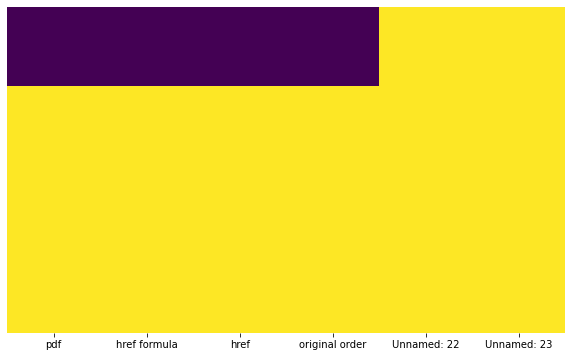

In [94]:
check_nan(subset4)

## Columnas 'Unnamed: 22' y 'Unnamed: 23'

In [95]:
subset4['Unnamed: 22'].unique()

array([nan, 'stopped here'], dtype=object)

In [96]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset4['Unnamed: 22'][i] = 'None'
        
list(subset4['Unnamed: 22'].unique())

[nan, 'stopped here', 'None']

In [97]:
subset4['Unnamed: 22'] = subset4['Unnamed: 22'].fillna('Unknown')

In [98]:
subset4['Unnamed: 23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [99]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset4['Unnamed: 23'][i] = 'None'
        
list(subset4['Unnamed: 23'].unique())

[nan, 'Teramo', 'change filename', 'None']

In [100]:
subset4['Unnamed: 23'] = subset4['Unnamed: 23'].fillna('Unknown')

'N nan cols: 4'

pdf               75.500525
href formula      75.504412
href              75.500525
original order    75.473312
dtype: float64

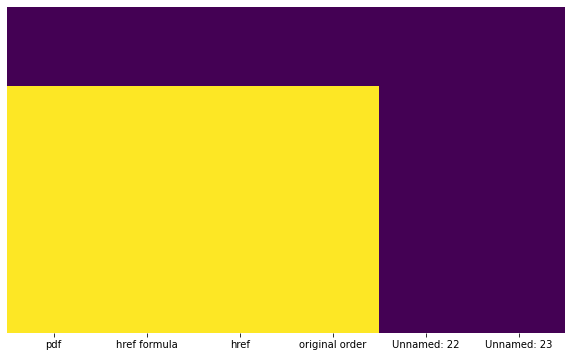

In [101]:
check_nan(subset4)

# Columna pdf

In [102]:
subset4.pdf.unique()

array(['2018.06.25-Wolfe.pdf', '2018.06.18-McNeely.pdf',
       '2018.06.09-Denges.pdf', ..., 'ND-0002-JulesPatterson.pdf',
       'ND-0001-Ceylon.pdf', nan], dtype=object)

In [103]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset4['pdf'][i] = 'None'
        
list(subset4['pdf'].unique())

['2018.06.25-Wolfe.pdf',
 '2018.06.18-McNeely.pdf',
 '2018.06.09-Denges.pdf',
 '2018.06.08-Arrawarra.pdf',
 '2018.06.04-Ramos.pdf',
 '2018.06.03.b-FlatRock.pdf',
 '2018.06.03.a-daSilva.pdf',
 '2018.05.27-Ponce.pdf',
 '2018.05.26.b-High.pdf',
 '2018.05.26.a-DaytonaBeach.pdf',
 '2018.05.24-CairnsAquarium.pdf',
 '2018.05.21-deBoer.pdf',
 '2018.05.13.b-Turrell.pdf',
 '2018.05.13.a-Berryman.pdf',
 '2018.05.00-Brunning.pdf',
 '2018.05.12-EastLondon.pdf',
 '2018.05.09-SharpesBeach.pdf',
 '2018.04.30.R-Thailand.pdf',
 '2018.04.28.b-CostaRica.pdf',
 '2018.04.28.a-Murray.pdf',
 '2018.04.25.b-Lee.pdf',
 '2018.04.25.a-Bruce.pdf',
 '2018.04.24-Burch.pdf',
 '2018.04.23-Maldives.pdf',
 '2018.04.22-PlettenbergBay.pdf',
 '2018.04.19-McWilliams.pdf',
 '2018.04.15.d-Thailand.pdf',
 '2018.04.15.c-deMelo.pdf',
 '2018.04.15.b-Longrass.pdf',
 '2018.04.15.a-Travaglini.pdf',
 '2018.04.14-Rowan.pff',
 '2018.04.10.R-Paz.pdf',
 '2018.04.09-Magenta.pdf',
 '2018.04.05-McConnell.pdf',
 '2018.04.03-StFrancisBay.pdf',

In [104]:
subset4['pdf'] = subset4['pdf'].fillna('Unknown')

In [105]:
subset4['pdf'] = subset4['pdf'].astype(str)

'N nan cols: 3'

href formula      75.504412
href              75.500525
original order    75.473312
dtype: float64

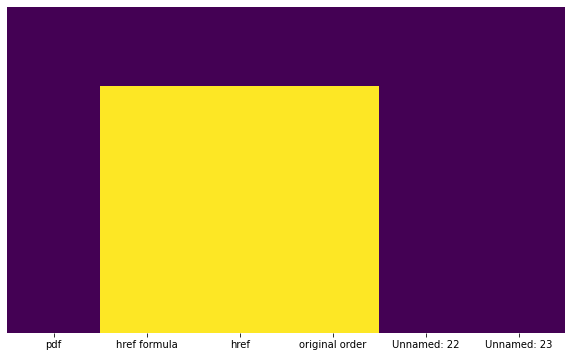

In [106]:
check_nan(subset4)

## Columna 'href'

In [107]:
list(subset4['href'].unique())

['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-Arrawarra.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-Ramos.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.b-FlatRock.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.b-High.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.a-DaytonaBeach.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.24-CairnsAquarium.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.21-deBoer.pdf',
 'http://sharkat

In [108]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset4['href'][i] = 'None'
        
list(subset4['href'].unique())

['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-Arrawarra.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-Ramos.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.b-FlatRock.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.b-High.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.a-DaytonaBeach.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.24-CairnsAquarium.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.21-deBoer.pdf',
 'http://sharkat

In [109]:
subset4['pdf'] = subset4['pdf'].fillna('Unknown')

'N nan cols: 2'

href formula      75.504412
original order    75.473312
dtype: float64

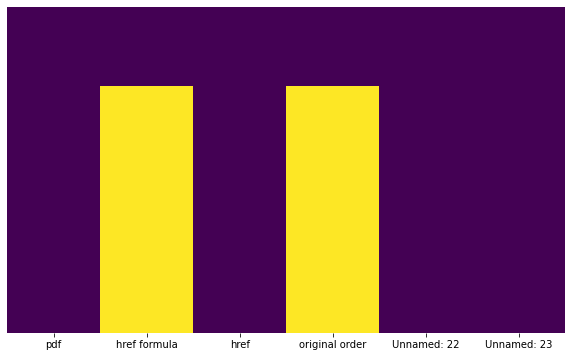

In [110]:
check_nan(subset4)

## Columna 'href formula'

In [111]:
subset4['href formula'] = subset4['href']

## Columna 'original order'

In [112]:
list(subset4['original order'].unique())

[6303.0,
 6302.0,
 6301.0,
 6300.0,
 6299.0,
 6298.0,
 6297.0,
 6296.0,
 6295.0,
 6294.0,
 6293.0,
 6292.0,
 6291.0,
 6290.0,
 6289.0,
 6288.0,
 6287.0,
 6286.0,
 6285.0,
 6284.0,
 6283.0,
 6282.0,
 6281.0,
 6280.0,
 6279.0,
 6278.0,
 6277.0,
 6276.0,
 6275.0,
 6274.0,
 6273.0,
 6272.0,
 6271.0,
 6270.0,
 6269.0,
 6268.0,
 6267.0,
 6266.0,
 6265.0,
 6264.0,
 6263.0,
 6262.0,
 6261.0,
 6260.0,
 6259.0,
 6258.0,
 6257.0,
 6256.0,
 6255.0,
 6254.0,
 6253.0,
 6252.0,
 6251.0,
 6250.0,
 6249.0,
 6248.0,
 6247.0,
 6246.0,
 6245.0,
 6244.0,
 6243.0,
 6242.0,
 6241.0,
 6240.0,
 6239.0,
 6238.0,
 6237.0,
 6236.0,
 6235.0,
 6234.0,
 6233.0,
 6232.0,
 6231.0,
 6230.0,
 6229.0,
 6228.0,
 6227.0,
 6226.0,
 6225.0,
 6224.0,
 6223.0,
 6222.0,
 6221.0,
 6220.0,
 6219.0,
 6218.0,
 6217.0,
 6216.0,
 6215.0,
 6214.0,
 6213.0,
 6212.0,
 6211.0,
 6210.0,
 6209.0,
 6208.0,
 6207.0,
 6206.0,
 6205.0,
 6204.0,
 6203.0,
 6202.0,
 6201.0,
 6200.0,
 6199.0,
 6198.0,
 6197.0,
 6196.0,
 6195.0,
 6194.0,
 6193.0,
 

In [113]:
for i in range(df.shape[0]):
    
    if fechas['Case Number.1'][i] == 'Inexistente':
        subset4['original order'][i] = 'None'
        
list(subset4['original order'].unique())

[6303.0,
 6302.0,
 6301.0,
 6300.0,
 6299.0,
 6298.0,
 6297.0,
 6296.0,
 6295.0,
 6294.0,
 6293.0,
 6292.0,
 6291.0,
 6290.0,
 6289.0,
 6288.0,
 6287.0,
 6286.0,
 6285.0,
 6284.0,
 6283.0,
 6282.0,
 6281.0,
 6280.0,
 6279.0,
 6278.0,
 6277.0,
 6276.0,
 6275.0,
 6274.0,
 6273.0,
 6272.0,
 6271.0,
 6270.0,
 6269.0,
 6268.0,
 6267.0,
 6266.0,
 6265.0,
 6264.0,
 6263.0,
 6262.0,
 6261.0,
 6260.0,
 6259.0,
 6258.0,
 6257.0,
 6256.0,
 6255.0,
 6254.0,
 6253.0,
 6252.0,
 6251.0,
 6250.0,
 6249.0,
 6248.0,
 6247.0,
 6246.0,
 6245.0,
 6244.0,
 6243.0,
 6242.0,
 6241.0,
 6240.0,
 6239.0,
 6238.0,
 6237.0,
 6236.0,
 6235.0,
 6234.0,
 6233.0,
 6232.0,
 6231.0,
 6230.0,
 6229.0,
 6228.0,
 6227.0,
 6226.0,
 6225.0,
 6224.0,
 6223.0,
 6222.0,
 6221.0,
 6220.0,
 6219.0,
 6218.0,
 6217.0,
 6216.0,
 6215.0,
 6214.0,
 6213.0,
 6212.0,
 6211.0,
 6210.0,
 6209.0,
 6208.0,
 6207.0,
 6206.0,
 6205.0,
 6204.0,
 6203.0,
 6202.0,
 6201.0,
 6200.0,
 6199.0,
 6198.0,
 6197.0,
 6196.0,
 6195.0,
 6194.0,
 6193.0,
 

'N nan cols: 0'

Series([], dtype: float64)

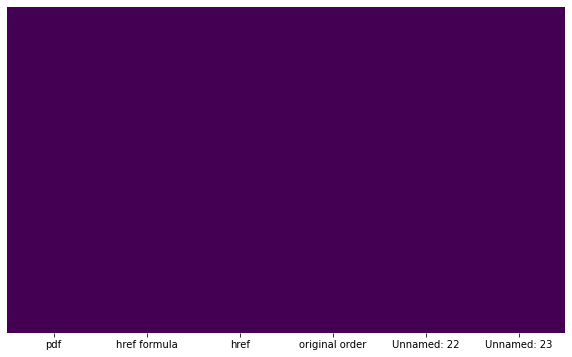

In [114]:
check_nan(subset4)

In [115]:
subset4.head()

,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,Unknown,Unknown
1,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,Unknown,Unknown
2,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,Unknown,Unknown
3,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,Unknown,Unknown
4,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,Unknown,Unknown


# Tratamiento del subset {'Name', 'Time', 'Species'}

In [117]:
subset5 = df[['Name', 'Time', 'Species ']]

In [119]:
subset5.head()

,Name,Time,Species
0,Julie Wolfe,18h00,White shark
1,Adyson�McNeely,14h00 -15h00,NaN
2,John Denges,07h45,NaN
3,male,NaN,2 m shark
4,Gustavo Ramos,NaN,"Tiger shark, 3m"


'N nan cols: 3'

Name        76.316915
Time        88.539439
Species     86.533453
dtype: float64

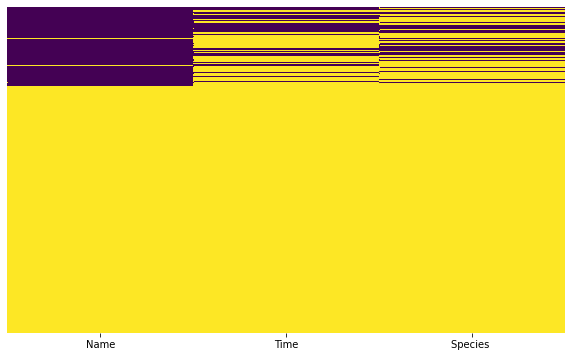

In [118]:
check_nan(subset5)

## Columna 'Name'

## Columna 'Time'

## Columna 'Species'